# 머신러닝
- 기계 스스로 데이터를 학습하여 서로 다른 변수간의 관계를 찾아 나가는 관정

## 머신러닝의 방향
* 예측 ex) 주가, 환율 등 결제 지표
* 분류 ex) 은행에서 고객이 대출을 받고자 할때, 승인이나 거절하는 문제
* 군집 ex) 비슷한 소비패턴을 가진 고객유형을 묶는 객체

## 머신러닝 유형
- 지도학습 : 정답데이터를 다른 데이터와 함께 컴퓨터 알고리즘에 입력하는 방식
    - 회귀분석 분류
- 비지도학습 : 정답데이터 없이 컴퓨터 알고리즘 스스로 데이터로부터 패턴을 찾아내는 방식 - 군집

## 머신러닝 프로세스
> 데이터를 정리 -> 데이터분리(훈련/검증) -> 알고리즘준비 -> 모형학습(훈련데이터) -> 예측(검증데이터) -> 모형 평가 -> 모형 활용

# 단순회귀분석
- 소득이 증가하면 소비가 증가한다.  
- 어떤 변수가 다른 변수에 영향을 준다면, '두 변수 사이에 선형관계까 있다'고 한다.
- 선형관계를 알고 있다면, 새로운 독립변수 x값이 주어졌을때, 거기에 대응되는 종속변수 y값을 예측할 수 있고, 이 처럼 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 말한다.
- 수학적으로 종속변수(y)와 독립변수(x)사이의 관계를 1차 함수로 y= ax+b로 나타내며, 이때 직선의 기울기(a)와 직선의 y축과 교차하는 지점인 y절편(b)을 반복 학습을 통해 찾는다.

# 상관관계 찾아보기

## 데이터 정리

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import shutil
# shutil.move('C:/Users/i7B/Downloads/auto-mpg.csv','auto-mpg.csv')

데이터 분비 : read_csv ㅎ마수로 자동차 연비 데이터셋 가져오기

In [3]:
df=pd.read_csv('auto-mpg.csv',header=None)

In [4]:
df.columns=['mpg','cylinders','displacement','horsepower',
           'weight','acceleration','model year','origin','name']

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


데이터 탐색 : info와 describe 메소드로 정보를 알아보기

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
df['horsepower'].replace('?',np.nan,inplace=True)

In [10]:
df.dropna(subset=['horsepower'],axis=0,inplace=True)

In [11]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [12]:
df['horsepower']=df['horsepower'].astype('float')

In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


속성 성택 : 종속변수='mpg' , 독립변수={'cylinders','horsepower','weight'}

In [14]:
ndf = df[['mpg', 'cylinders','horsepower','weight']]

In [15]:
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


두 변수간의 선형관계가 있는지 그래프를 그려서 확인하기

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

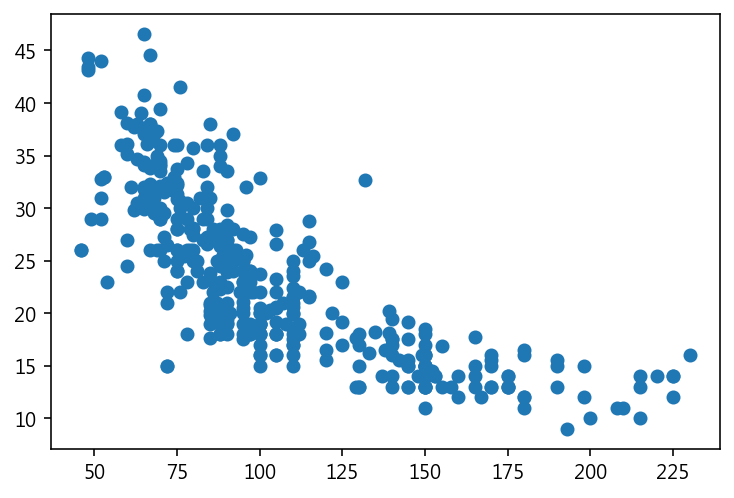

In [17]:
plt.scatter(x=ndf['horsepower'],y=ndf['mpg'])

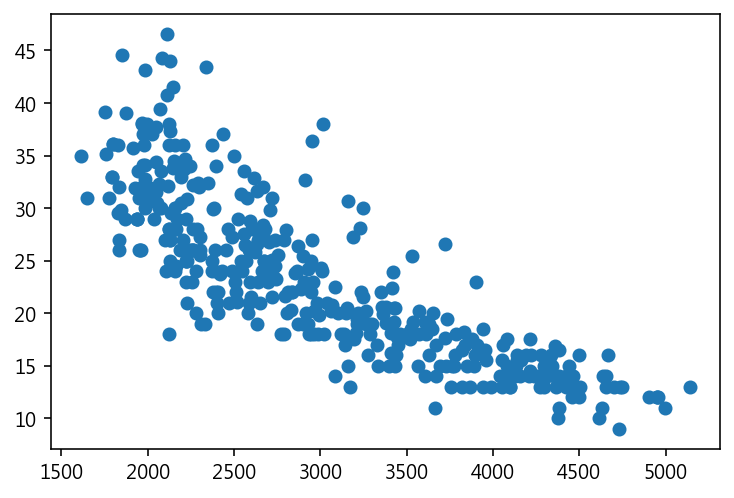

In [18]:
plt.scatter(x=ndf['weight'],y=ndf['mpg'])

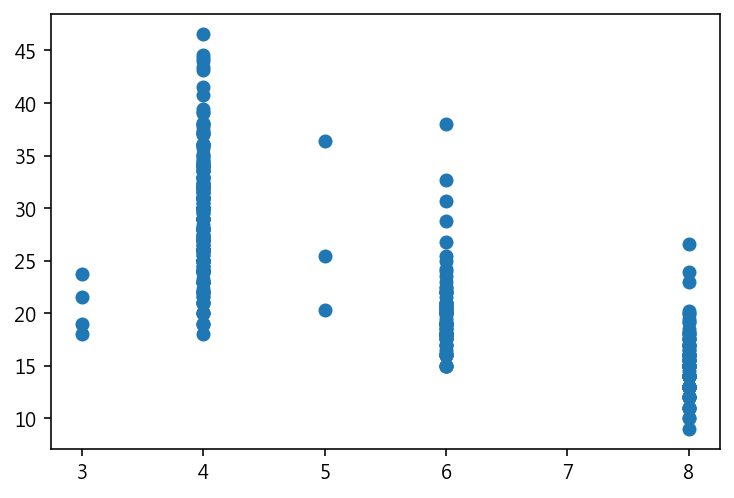

In [19]:
plt.scatter(x=ndf['cylinders'],y=ndf['mpg'])

In [20]:
import seaborn as sns

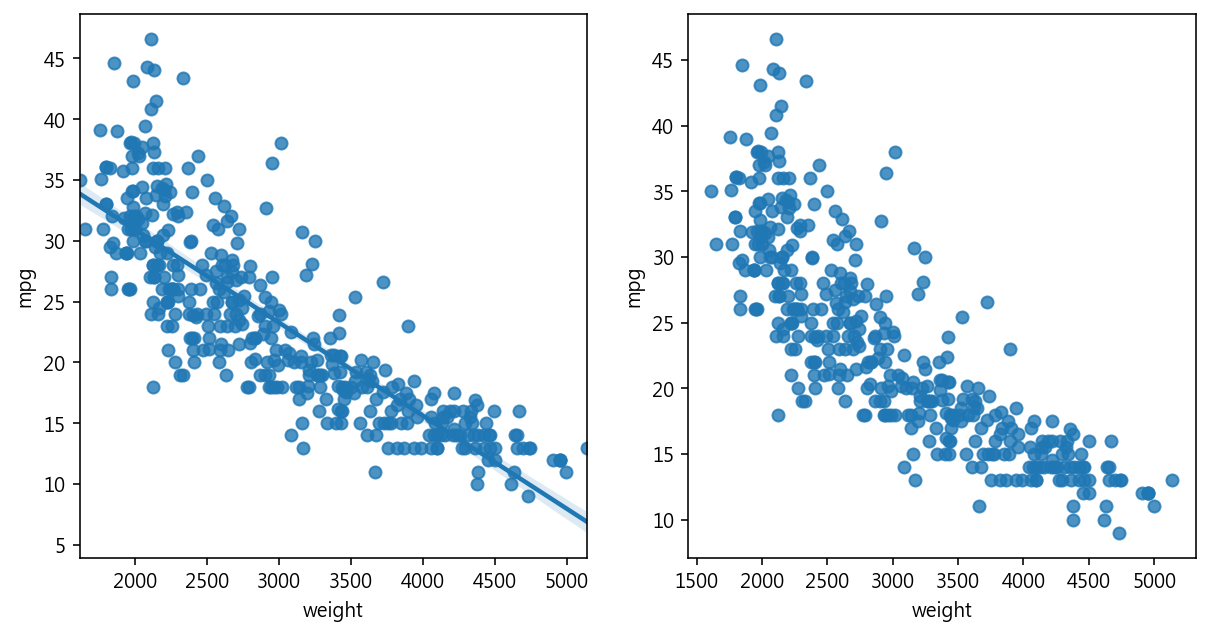

In [21]:
fig = plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax1) # 회귀선이 자동으로 표시
sns.regplot(x='weight',y='mpg',data=ndf,ax=ax2, fit_reg=False) # 회귀선 미표시

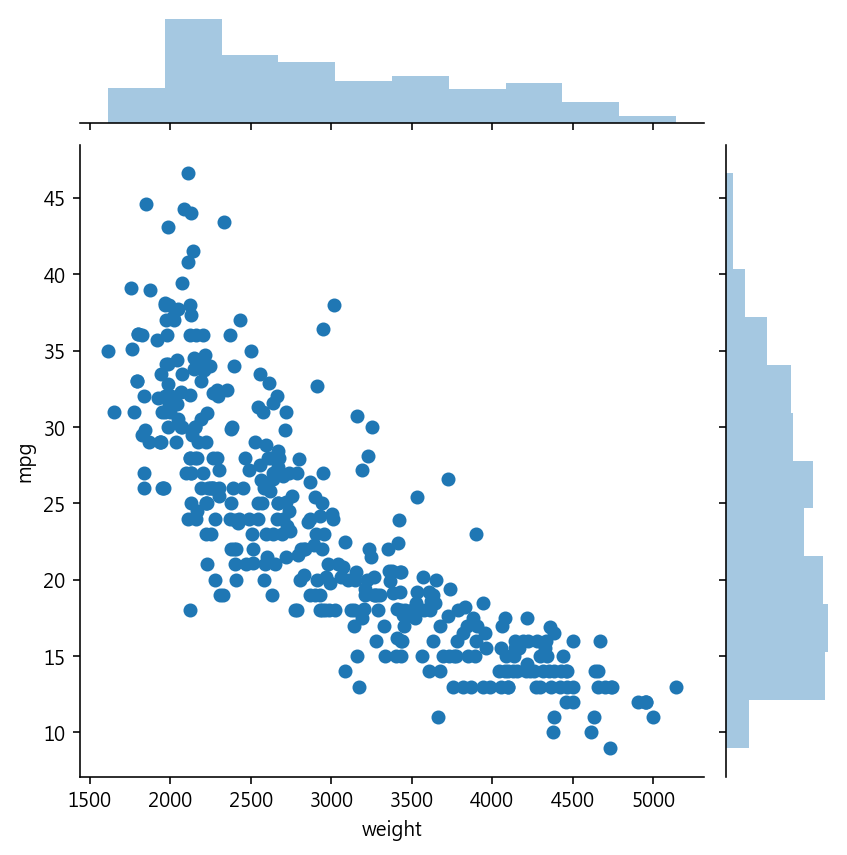

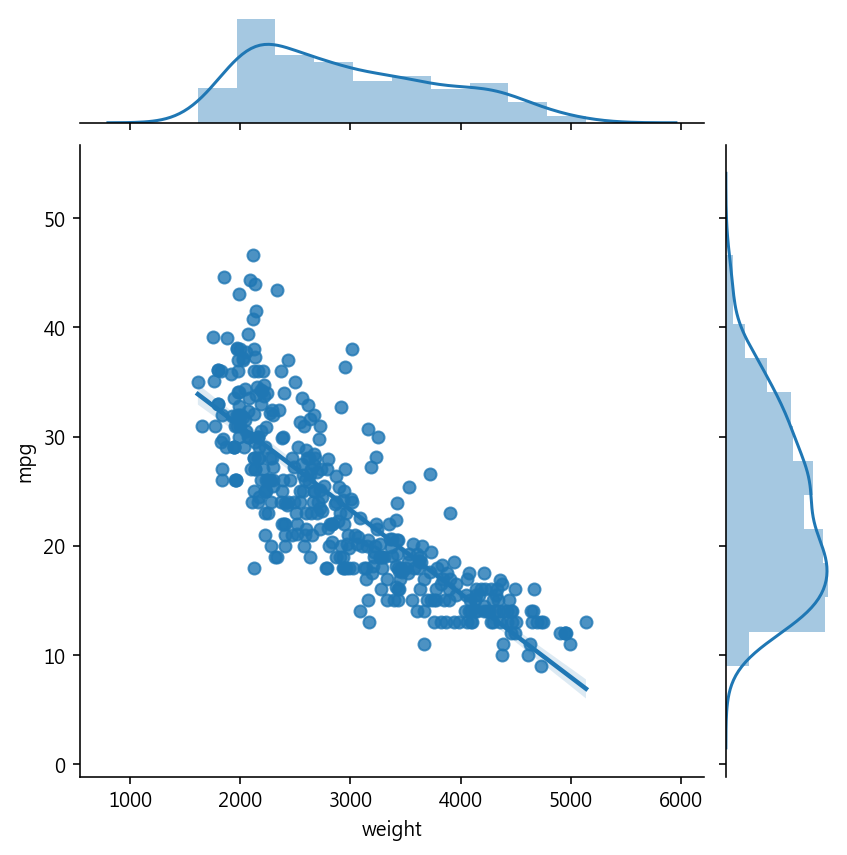

In [22]:
sns.jointplot(x='weight',y='mpg',data=ndf)
sns.jointplot(x='weight',y='mpg',data=ndf, kind='reg')

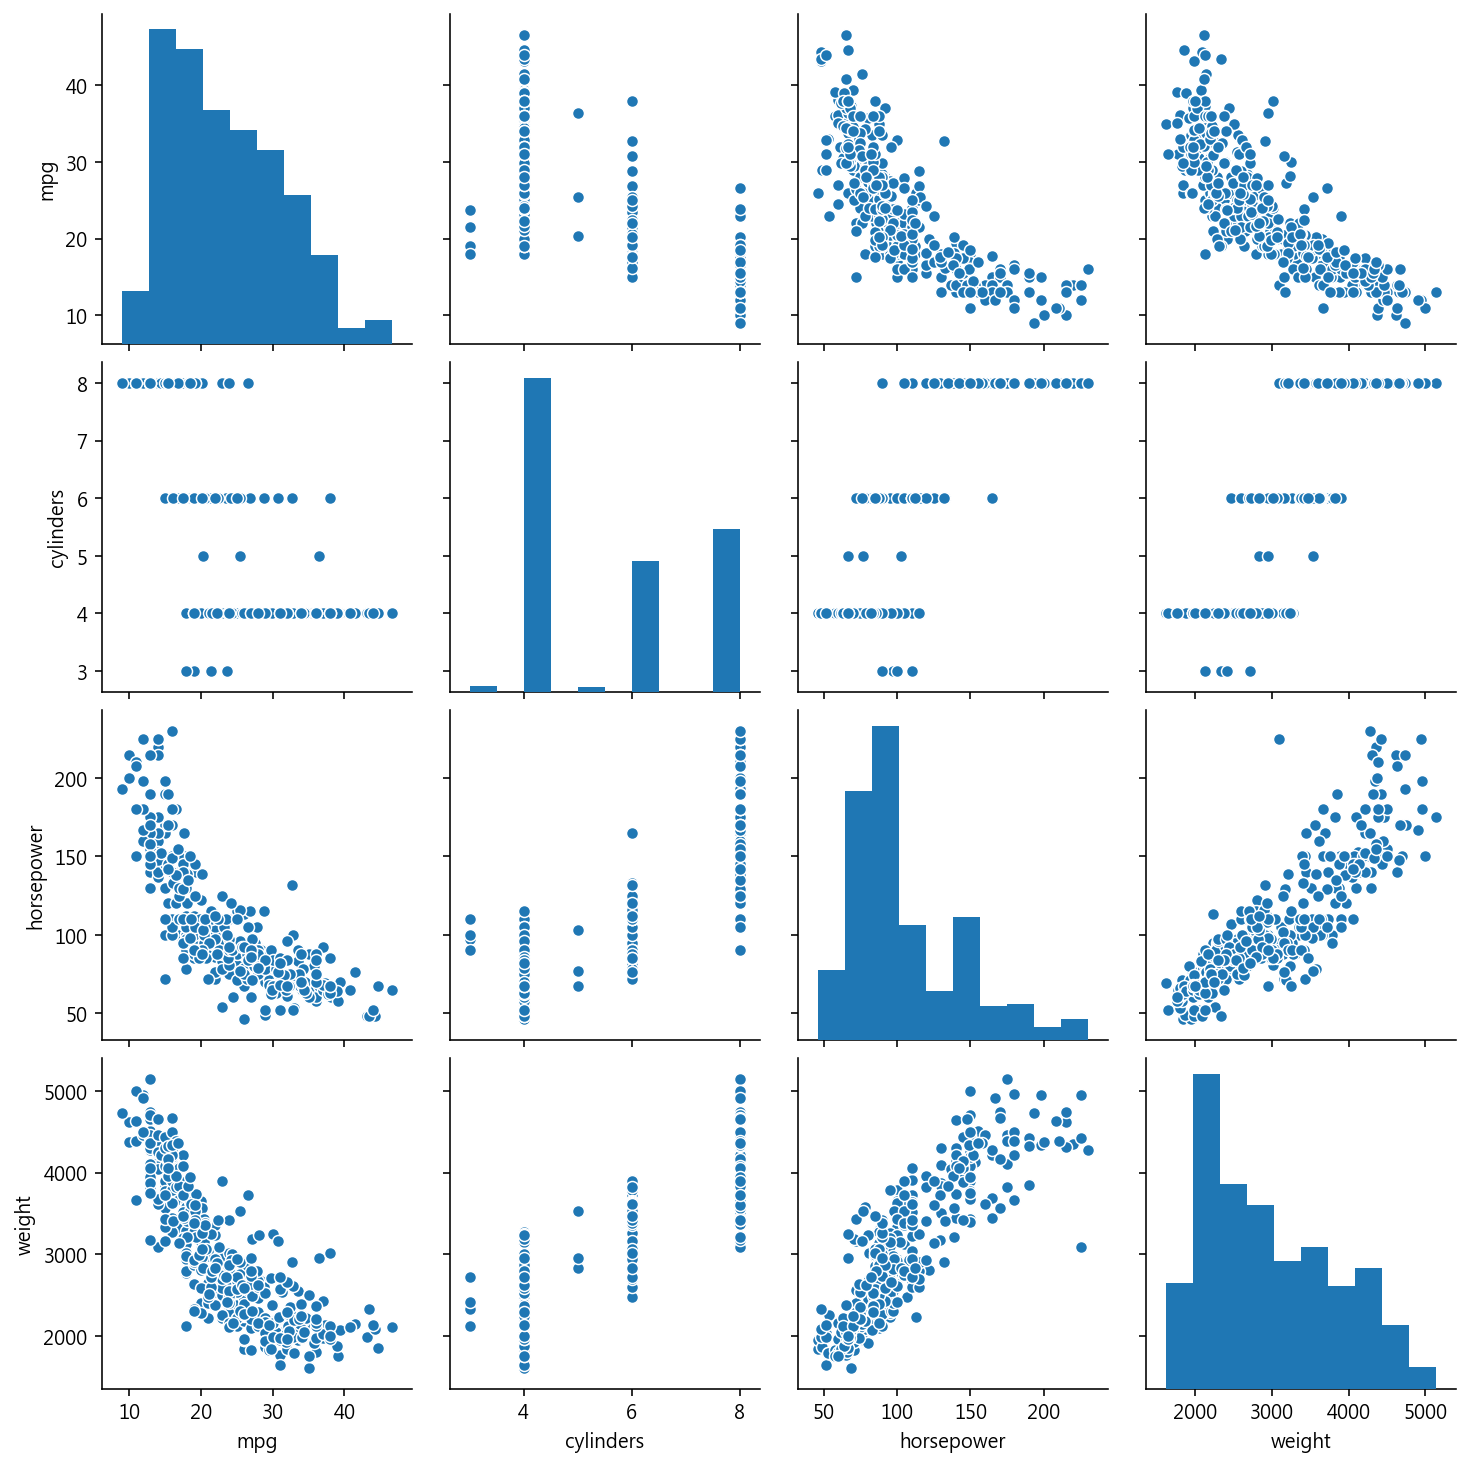

In [23]:
sns.pairplot(ndf)

## 데이터 분리

그래프를 보면 연비(mpg)는 중량(weight)과 마력(horsepower)에 선형관계가 보인다.  
독립변수 x는 weight를 선택 종속 y 는 (horsepower)

이번에는 두 변수간의 회귀방정식을 찾아야 한다.  
훈련데이터와 검증데이터로 나눠서 모형을 구축한다.  
7:3 비율로 만들어보자(훈련데이터:검증데이터)

> Scikit-learn : 파이썬의 대표적인 머신러닝 라이브러리  
- 분류, 회귀, 군집화, 의사결정트리 등의 다양한 머신러닝 알고리즘을 가지는 함수를 제공

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=ndf[['weight']]
Y=ndf[['mpg']]

In [26]:
X

,weight
0,3504.0
1,3693.0
2,3436.0
3,3433.0
4,3449.0
...,...
393,2790.0
394,2130.0
395,2295.0
396,2625.0


In [27]:
Y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,# X는 독립변수
                                               Y,# Y는 종속변수
                                               test_size=0.3, # 검증비율
                                               random_state=10# 랜덤추출
)

In [29]:
print('train data 갯수:', len(X_train))
print('test data 갯수:', len(X_test))

train data 갯수: 274
test data 갯수: 118


단순회귀 분석모형 = sklearn 안에 LinearRegression()함수 - 선형회귀

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 단순회귀 분석 모형 객체 생성
lr.fit(X_train,Y_train) # train data를 가지고 모형 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

학습을 마친 모형의 test data를 적용하여 결정계수(R-제곱) 계산

In [31]:
r_square = lr.score(X_test,Y_test)

In [32]:
r_square

0.6822458558299325

Y= aX+B  


In [33]:
# 회귀 식의 기울기 a구하기
print("기울기 a :",lr.coef_)

기울기 a : [[-0.00775343]]


In [34]:
# 회귀식의 y절편 b 구하기
print("y절편 b :",lr.intercept_)

y절편 b : [46.71036626]


모형에 전체 X데이터를 입력하여 예측한 값 y hat을 실제 y값과 비교해보기  
독립변수 전체 데이터 X를 predict() 메소드에 입력하면 모형이 반환되는 예측값이 나온다

In [35]:
y_hat = lr.predict(X)

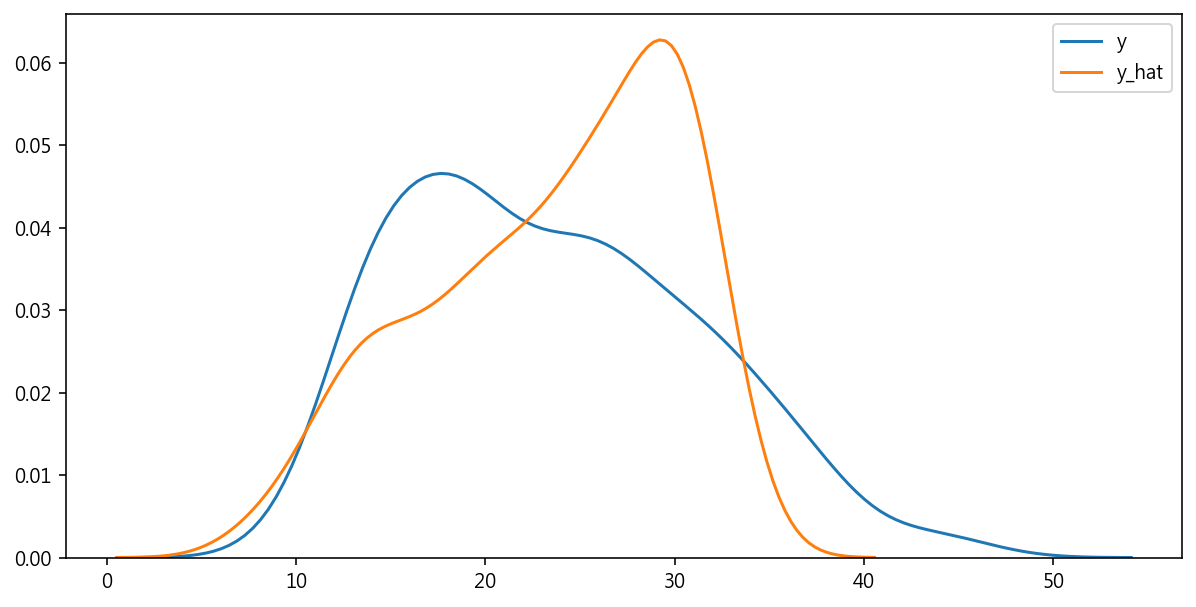

In [36]:
plt.figure(figsize=(10,5))
ax1=sns.distplot(Y,hist=False, label='y')
ax2=sns.distplot(y_hat,hist=False, label='y_hat',ax=ax1)

# 다항 회귀 분석

- 직선으로 설명하는 것이 부적합할 경우, 다항 함수를 사용하면 보다 복잡한 곡선 형태의 회귀선을 표현할 수 있다.
- 2차함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘  
- 2차함수는 종속변수 Y와 독립변수 X사이의 관계를 y=ax^2+bx+c로 표시하여 설명
- 다항회귀분석은 학습을 통해 3개의 계수 a,b,c를 찾아서 모형을 완성하는 방법이다.

sklearn의 선형회귀분석 함수 LinearRegression과 다항식 변환을 위한 PloynomialFeatrues를 불러오자

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly=PolynomialFeatures(degree=2) # 2차항 객체 poly가 생성

X_train 데이터를 2차항으로 변형

In [39]:
X_train_poly=poly.fit_transform(X_train)

In [40]:
print("X_train의 모형 :", X_train.shape)
print("X_train_poly의 모형 :", X_train_poly.shape)

X_train의 모형 : (274, 1)
X_train_poly의 모형 : (274, 3)


In [41]:
pr=LinearRegression()
pr.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

score()메소들르 사용하기위해  
검증 데이터도 2차항으로 변환

In [42]:
X_test_poly=poly.fit_transform(X_test)

In [44]:
r_square=pr.score(X_test_poly,Y_test)

훈련 데이터의 분포와 학습된 모형의 회귀선을 그래프로 출력해서 비교

In [45]:
y_hat_test=pr.predict(X_test_poly)

Text(0, 0.5, '연비')

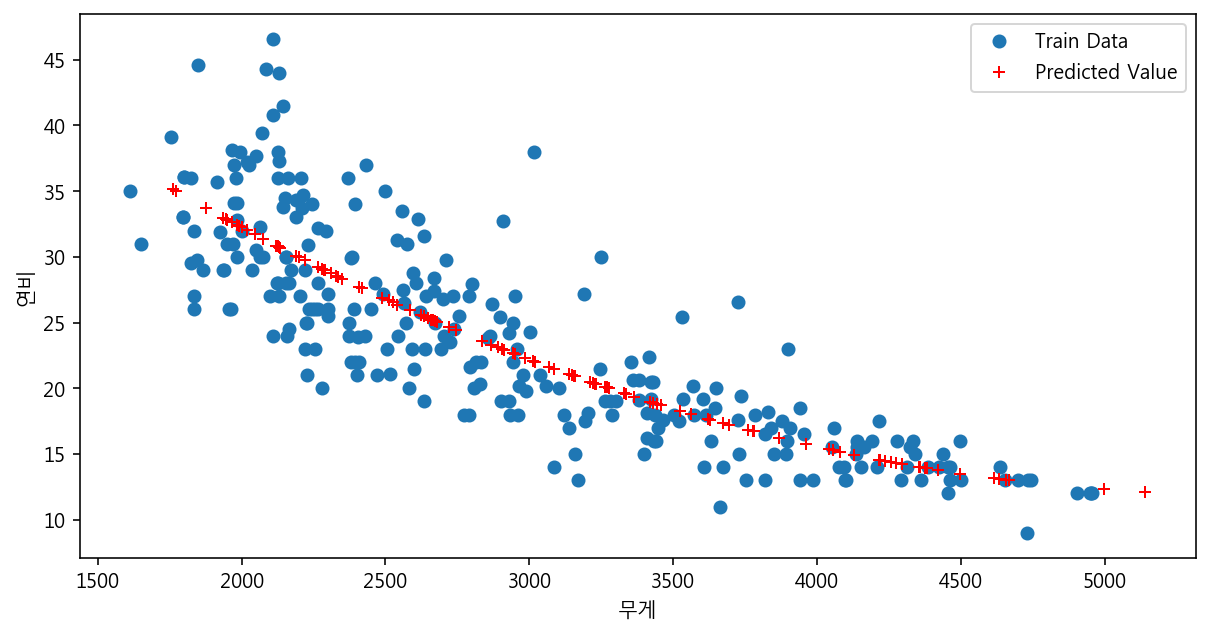

In [47]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(X_train,Y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+',label="Predicted Value")
ax.legend(loc='best')
plt.xlabel('무게')
plt.ylabel("연비")

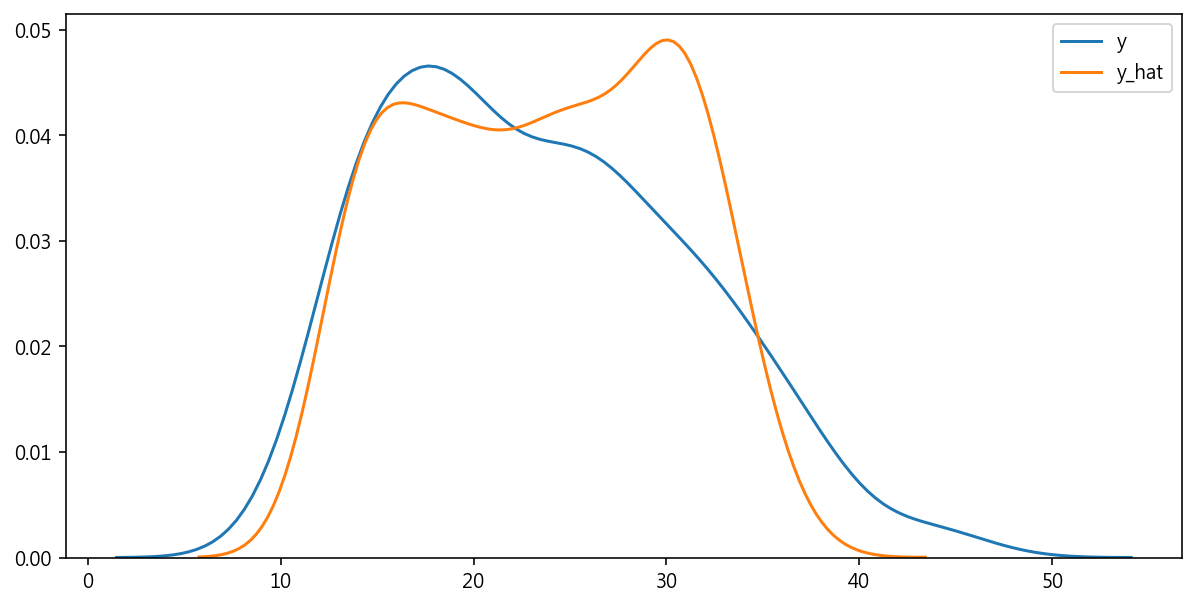

In [52]:
X_poly=poly.fit_transform(X)
y_hat=pr.predict(X_poly)
plt.figure(figsize=(10,5))
ax1=sns.distplot(Y, hist=False, label='y')
ax2=sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)